## Generate injection (170817 like) for varying $D_L$

In [1]:
# Generer les injections pour 1 param 
# ex avec Dl
#import numpy as np
#import matplotlib.pyplot as plt

#D_L_small = np.arange(0, 500, 50)  # Mpc 

#Inj_param = { # 170817 like injection
#    'KNphi': 31,  # deg
#    'KNtheta': 24,  # deg
#    'log10_mej_dyn': -2.24, # Dynamical ejecta mass              
#    'log10_mej_wind': -1,    # Wind ejecta mass
#}

### Use ``lightcurve-analysis`` on all the injections

In [2]:
#import subprocess
#import tqdm
#import json
#import os

#for i, D_L in enumerate(tqdm.tqdm(D_L_small)):
#    # Create injection dictionary
#    inj_dict = Inj_param.copy()
#    inj_dict['luminosity_distance'] = float(D_L)
    
    # JSON structure identical to injection.json
#    injection_data = {
#        "injections": {
#            "__dataframe__": True,
#            "content": {
#                "simulation_id": [i],
#                "KNphi": [inj_dict['KNphi']],
#                "KNtheta": [inj_dict['KNtheta']],
#                "log10_mej_dyn": [inj_dict['log10_mej_dyn']],
#                "log10_mej_wind": [inj_dict['log10_mej_wind']],
#                "luminosity_distance": [inj_dict['luminosity_distance']],
#                "geocent_time": [60000],  # Example value
#            }
#        }
#    }
    
    # Save JSON file
#    inj_file = f"/home/liteul/memoir_code/D_L_injection_plot/D_L{D_L:.0f}/injection_DL{D_L:.0f}.json"
#    os.makedirs(os.path.dirname(inj_file), exist_ok=True)

#    with open(inj_file, 'w') as f:
#        json.dump(injection_data, f, indent=2)
    
#    print(f"Created file {inj_file}")

    # NMMA lightcurve analysis
#    cmd = f"lightcurve-analysis --model Bu2019lm --svd-path NMMA/svdmodels --outdir /home/liteul/memoir_code/D_L_injection_plot/D_L{D_L:.0f} --label {D_L:.0f} --prior NMMA/priors/Bu2019lm1000.prior --tmin 0.1 --tmax 20 --dt 0.1 --nlive 64 --Ebv-max 0 --injection {inj_file} --injection-num 0 --injection-outfile /home/liteul/memoir_code/D_L_injection_plot/out_D_L{D_L:.0f}.csv --generation-seed 42 --filters ps1__g,ps1__r,ps1__i,ps1__z,sdssu,2massh --remove-nondetections --error-budget 0.5"

#    result = subprocess.run(cmd, capture_output=True, text=True, shell=True)
#    if result.returncode == 0:
#        print(f"{D_L:.0f} Mpc: Lightcurve analysis completed successfully.")
#    else:
#        print(f"Error for D_L={D_L:.0f} Mpc (exit code {result.returncode}):")
#        print(result.stderr)

### PP plot for $D_L$

In [3]:
# Extract all the out posterior on D_L and plot best fit vs injected D_L
#import pandas as pd
#import glob
#import matplotlib.pyplot as plt

#for D_L in D_L_small:
#    out_file = f"/home/liteul/memoir_code/D_L_injection_plot/D_L{D_L:.0f}/{D_L:.0f}_posterior_samples.dat"
#    df = pd.read_csv(out_file, delim_whitespace=True)
#    D_L_median = df['luminosity_distance'].median()
#    D_L_16 = df['luminosity_distance'].quantile(0.16)
#    D_L_84 = df['luminosity_distance'].quantile(0.84)
#    
#    plt.errorbar(D_L, D_L_median, yerr=[[D_L_median - D_L_16], [D_L_84 - D_L_median]], fmt='o', markersize=5, color='blue', ecolor='red', zorder=10)
# plot identity line
#plt.plot([0, 500], [0, 500], 'k--', label='identity line', zorder=0, alpha=0.25)
#plt.xlabel('Injected Luminosity Distance (Mpc)')
#plt.ylabel('Recovered Luminosity Distance (Mpc)')
#plt.legend()
#plt.title('Injection-Recovery of Luminosity Distance')

## Visualize NMMA sim param distributions

In [4]:
# Plot corner of NMMA sim event to show parameter distributions
#import corner

#samples = pd.read_csv('/home/liteul/memoir_code/injections.dat', delim_whitespace=True)

#figure = corner.corner(samples[['distance', 'inclination', 'mass1', 'mass2']], labels=['distance', 'inclination', 'mass1', 'mass2'], show_titles=True)

In [5]:
# other file

#samples = pd.read_csv('/home/liteul/memoir_code/bns_O4_injections.dat', delim_whitespace=True)

#figure = corner.corner(samples[['distance', 'inclination', 'mass1', 'mass2']], labels=['distance', 'inclination', 'mass1', 'mass2'], show_titles=True)

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import subprocess
import tqdm
import json
import os
import numpy as np
import matplotlib.pyplot as plt

## Generate manually binary injections for NMMA's ``create-injections``

### Generate sim file

In [7]:
# Create injection file similar to injections.dat
inj_number = 10

samples = pd.read_csv('/home/liteul/memoir_code/bns_O4_injections.dat', delim_whitespace=True)
injection_df = pd.DataFrame(columns=['simulation_id', 'longitude', 'latitude', 'inclination', 'distance', 'mass1', 'mass2', 'spin1z', 'spin2z'])

np.random.seed(42)  # For reproducibility
# Create random combinations of parameters for injections
for i in range(inj_number):
    injection = [int(i+1),  # simulation_id
                 np.random.uniform(samples['longitude'].min(), samples['longitude'].max()),  # longitude
                 np.random.uniform(samples['latitude'].min(), samples['latitude'].max()),  # latitude
                 np.random.uniform(0, np.pi/2),  # inclination
                 np.random.uniform(0, 500),  # distance
                 np.random.uniform(1.0, 3.0),  # mass1
                 np.random.uniform(1.0, 3.0),  # mass2
                 np.random.uniform(np.min(samples['spin1z']), np.max(samples['spin1z'])),  # spin1z
                 np.random.uniform(np.min(samples['spin2z']), np.max(samples['spin2z'])) ]  # spin2z
    injection_df.loc[i] = injection

injection_df['simulation_id'] = injection_df['simulation_id'].astype(int)
file_path = '/home/liteul/memoir_code/manual_inj/manual_inj.dat'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
injection_df.to_csv(file_path, sep='\t', index=False)

### Create NMMA inj

In [8]:
import subprocess

cmd = [
    "nmma-create-injection",
    "--injection-file", "/home/liteul/memoir_code/manual_inj/manual_inj.dat",
    "--prior-file", "NMMA/priors/Bu2019lm500.prior",
    "--eos-file", "NMMA/EOS/15nsat_cse_uniform_R14/macro/2098",
    "--binary-type", "BNS",
    "--n-injection", f"{inj_number}",
    "--original-parameters",
    "--extension", "json",
    "--aligned-spin",
    "-f", "/home/liteul/memoir_code/manual_inj/injection.json"
]

result = subprocess.run(cmd, capture_output=True, text=True, cwd="/home/liteul/memoir_code")
print("STDOUT:\n", result.stdout)
print("STDERR:\n", result.stderr)
print("Exit code:", result.returncode)

STDOUT:
 
STDERR:
 08:30 bilby_pipe INFO    : Created injection file /home/liteul/memoir_code/manual_inj/injection.json

Exit code: 0


### Launch ``lightcurve-analysis``

In [9]:
for i in tqdm.tqdm(range(10)):    
    cmd = [
        "lightcurve-analysis",
        "--model", "Bu2019lm",
        "--svd-path", "NMMA/svdmodels",
        "--outdir", f"/home/liteul/memoir_code/manual_inj/inj_{i+1}",
        "--label", f"inj_{i+1}",
        "--prior", "NMMA/priors/Bu2019lm500.prior",
        "--tmin", "0.1",
        "--tmax", "20",
        "--dt", "0.1",
        "--nlive", "2048",
        "--Ebv-max", "0",
        "--injection", "/home/liteul/memoir_code/manual_inj/injection.json",
        "--injection-num", str(i), 
        "--injection-outfile", f"/home/liteul/memoir_code/manual_inj/inj_{i+1}/injection_out.csv",
        "--generation-seed", "42",
        "--filters", "ps1__g,ps1__r,ps1__i,ps1__z,sdssu,2massh",
        "--remove-nondetections",
        "--error-budget", "0.5"
    ]
    result = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, cwd="/home/liteul/memoir_code", bufsize=1)
    for line in result.stdout:
        print(line, end='')
    result.wait()
    if result.returncode == 0:
        print("Lightcurve analysis completed successfully.")
    else:
        print(f"Error (exit code {result.returncode}):")
        print(result.stderr)

  0%|          | 0/10 [00:00<?, ?it/s]

Install afterglowpy if you want to simulate afterglows.
Install wrapt_timeout_decorator if you want timeout simulations.
Creating light curve model for inference
/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Creating light curve model for inference
Creating injection light curve model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
Injection generated
Running with filters ['ps1__g', 'ps1__r', 'ps1__i', 'ps1__z', 'sdssu', '2massh']
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
/home/liteul/anaconda3/envs/nmma_env/lib/python

 10%|█         | 1/10 [1:33:01<13:57:14, 5581.59s/it]

Lightcurve analysis completed successfully.
Install afterglowpy if you want to simulate afterglows.
Install wrapt_timeout_decorator if you want timeout simulations.
Creating light curve model for inference
/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Creating light curve model for inference
Creating injection light curve model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
Injection generated
Running with filters ['ps1__g', 'ps1__r', 'ps1__i', 'ps1__z', 'sdssu', '2massh']
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
/ho

 20%|██        | 2/10 [2:38:38<10:15:11, 4614.00s/it]

Lightcurve analysis completed successfully.
Install afterglowpy if you want to simulate afterglows.
Install wrapt_timeout_decorator if you want timeout simulations.
Creating light curve model for inference
/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Creating light curve model for inference
Creating injection light curve model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
Injection generated
Running with filters ['ps1__g', 'ps1__r', 'ps1__i', 'ps1__z', 'sdssu', '2massh']
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
/ho

 30%|███       | 3/10 [4:03:44<9:24:32, 4838.92s/it] 

Lightcurve analysis completed successfully.
Install afterglowpy if you want to simulate afterglows.
Install wrapt_timeout_decorator if you want timeout simulations.
Creating light curve model for inference
/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Creating light curve model for inference
Creating injection light curve model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
Injection generated
Running with filters ['ps1__g', 'ps1__r', 'ps1__i', 'ps1__z', 'sdssu', '2massh']
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
/ho

 40%|████      | 4/10 [5:25:09<8:05:41, 4856.89s/it]

Lightcurve analysis completed successfully.
Install afterglowpy if you want to simulate afterglows.
Install wrapt_timeout_decorator if you want timeout simulations.
Creating light curve model for inference
/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Creating light curve model for inference
Creating injection light curve model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
Injection generated
Running with filters ['ps1__g', 'ps1__r', 'ps1__i', 'ps1__z', 'sdssu', '2massh']
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
/ho

 50%|█████     | 5/10 [6:41:08<6:35:48, 4749.70s/it]

Lightcurve analysis completed successfully.
Install afterglowpy if you want to simulate afterglows.
Install wrapt_timeout_decorator if you want timeout simulations.
Creating light curve model for inference
/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Creating light curve model for inference
Creating injection light curve model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
Injection generated
Running with filters ['ps1__g', 'ps1__r', 'ps1__i', 'ps1__z', 'sdssu', '2massh']
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
/ho

 60%|██████    | 6/10 [8:14:39<5:36:09, 5042.48s/it]

Lightcurve analysis completed successfully.
Install afterglowpy if you want to simulate afterglows.
Install wrapt_timeout_decorator if you want timeout simulations.
Creating light curve model for inference
/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Creating light curve model for inference
Creating injection light curve model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
Injection generated
Running with filters ['ps1__g', 'ps1__r', 'ps1__i', 'ps1__z', 'sdssu', '2massh']
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
/ho

 70%|███████   | 7/10 [9:32:41<4:06:13, 4924.47s/it]

Lightcurve analysis completed successfully.
Install afterglowpy if you want to simulate afterglows.
Install wrapt_timeout_decorator if you want timeout simulations.
Creating light curve model for inference
/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Creating light curve model for inference
Creating injection light curve model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
Injection generated
Running with filters ['ps1__g', 'ps1__r', 'ps1__i', 'ps1__z', 'sdssu', '2massh']
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
/ho

 80%|████████  | 8/10 [10:40:42<2:35:12, 4656.11s/it]

Lightcurve analysis completed successfully.
Install afterglowpy if you want to simulate afterglows.
Install wrapt_timeout_decorator if you want timeout simulations.
Creating light curve model for inference
/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Creating light curve model for inference
Creating injection light curve model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
Injection generated
Running with filters ['ps1__g', 'ps1__r', 'ps1__i', 'ps1__z', 'sdssu', '2massh']
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
/ho

 90%|█████████ | 9/10 [11:50:36<1:15:11, 4511.68s/it]

Lightcurve analysis completed successfully.
Install afterglowpy if you want to simulate afterglows.
Install wrapt_timeout_decorator if you want timeout simulations.
Creating light curve model for inference
/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
Creating light curve model for inference
Creating injection light curve model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
Injection generated
Running with filters ['ps1__g', 'ps1__r', 'ps1__i', 'ps1__z', 'sdssu', '2massh']
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter sdssu
Loaded filter 2massh
/ho

100%|██████████| 10/10 [13:19:44<00:00, 4798.45s/it] 

Lightcurve analysis completed successfully.


### PP plot for inj param

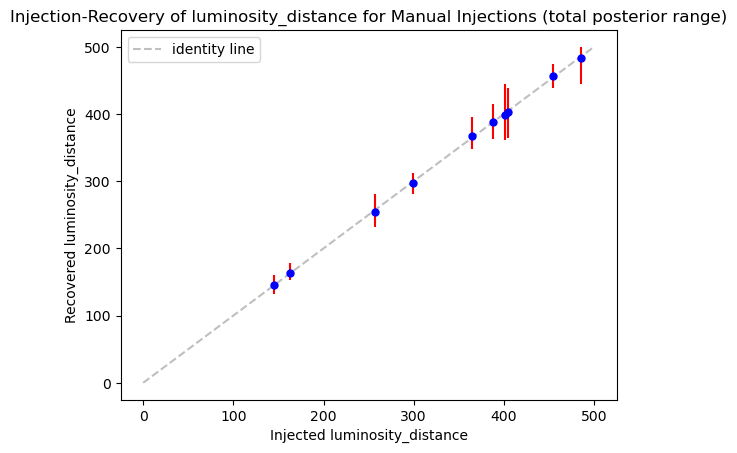

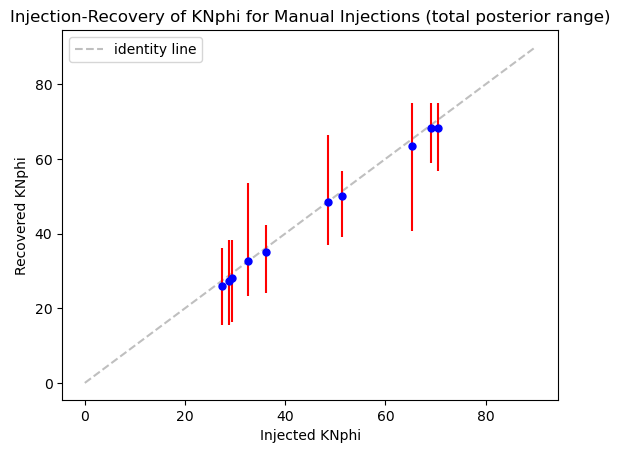

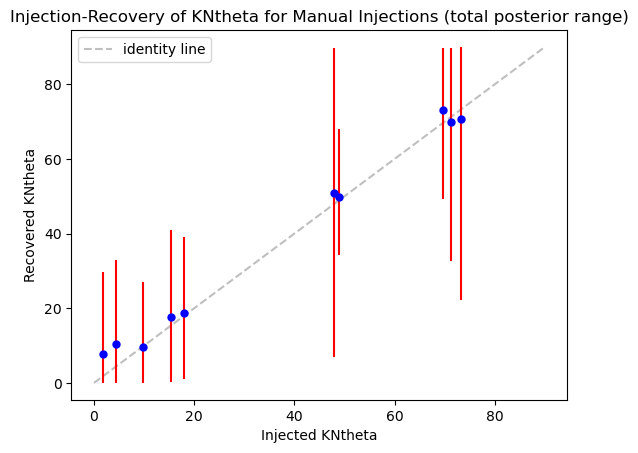

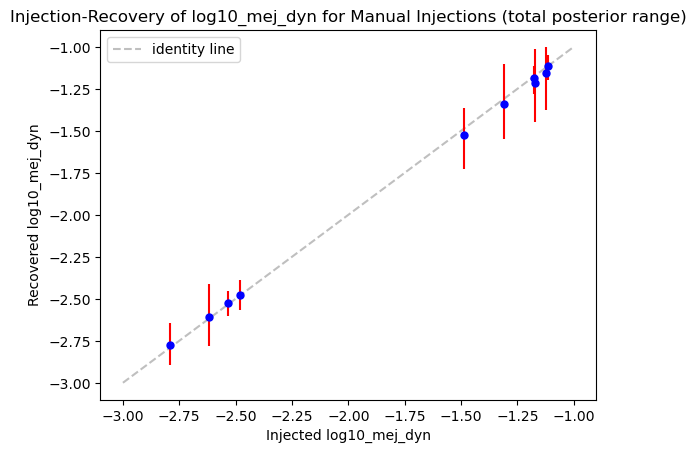

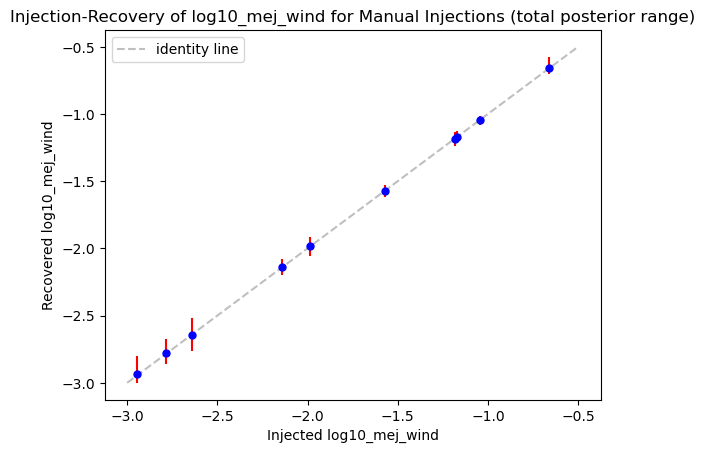

In [4]:
for (param, bounds) in zip(['luminosity_distance', 'KNphi', 'KNtheta', 'log10_mej_dyn', 'log10_mej_wind'], [(0, 500), (0, 90), (0, 90), (-3, -1), (-3, -0.5)]):
    for i in range(10):
        out_file = f"/home/liteul/memoir_code/manual_inj_test_nlive2048/inj_{i+1}/inj_{i+1}_posterior_samples.dat"
        df = pd.read_csv(out_file, delim_whitespace=True)
        D_L_median = df[param].median()
        D_L_16 = df[param].quantile(0.001)
        D_L_84 = df[param].quantile(0.999)
        # get inj val (json file)
        with open(f"/home/liteul/memoir_code/manual_inj_test_nlive2048/injection.json", 'r') as f:
            inj_data = json.load(f)
        D_L_inj = inj_data['injections']['content'][param][i]
        #print(f"Injection {i+1} for {param}: injected value = {D_L_inj}, recovered median = {D_L_median}")
        
        plt.errorbar(D_L_inj, D_L_median, yerr=[[D_L_median - D_L_16], [D_L_84 - D_L_median]], fmt='o', markersize=5, ecolor='red', color='blue', zorder=10)
    # plot identity line
    plt.plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', label='identity line', zorder=0, alpha=0.25)
    plt.xlabel(f'Injected {param}')
    plt.ylabel(f'Recovered {param}')
    plt.legend()
    plt.title(f'Injection-Recovery of {param} for Manual Injections (total posterior range)')
    file_path = f'/home/liteul/memoir_code/manual_inj_test_nlive2048/plots/{param}_injection_recovery.png'
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    plt.savefig(file_path)
    plt.show()

## ``GWEM-resampling`` for M1 M2 PP plot

In [ ]:
for i in tqdm.tqdm(range(10)):
    cmd = [
        "gwem-resampling",
        "--outdir", f"/home/liteul/memoir_code/manual_inj/inj_{i+1}/resampling",
        "--GWsamples", "/home/liteul/memoir_code/manual_inj/GWsamples.dat",
        "--GWprior", "NMMA/priors/GWBNS2.prior",
        "--EMsamples", f"/home/liteul/memoir_code/manual_inj/inj_{i+1}/test_manual_inj_posterior_samples.dat",
        "--EOSpath", "NMMA/EOS/15nsat_cse_uniform_R14/macro/",
        "--Neos", "5000",
        "--EMprior", "NMMA/priors/Bu2019lm_GW_500.prior",
        "--nlive", "2048"
    ]
    
    result = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, cwd="/home/liteul/memoir_code", bufsize=1)
    for line in result.stdout:
        print(line, end='')
    result.wait()
    if result.returncode == 0:
        print(f"Resampling {i+1}/10 completed successfully.")
    else:
        print(f"Error for injection {i+1} (exit code {result.returncode}):")
        print(result.stderr)

 10%|█         | 1/10 [00:58<08:44, 58.23s/it]

Resampling 1/10 completed successfully.


 20%|██        | 2/10 [03:46<16:21, 122.75s/it]

Resampling 2/10 completed successfully.


 30%|███       | 3/10 [04:19<09:33, 81.91s/it] 

Resampling 3/10 completed successfully.


 40%|████      | 4/10 [05:07<06:52, 68.71s/it]

Resampling 4/10 completed successfully.


 50%|█████     | 5/10 [05:56<05:06, 61.39s/it]

Resampling 5/10 completed successfully.


 60%|██████    | 6/10 [06:45<03:48, 57.10s/it]

Resampling 6/10 completed successfully.


 70%|███████   | 7/10 [08:29<03:37, 72.63s/it]

Resampling 7/10 completed successfully.


 80%|████████  | 8/10 [09:33<02:19, 69.82s/it]

Resampling 8/10 completed successfully.


 90%|█████████ | 9/10 [11:06<01:17, 77.14s/it]

Resampling 9/10 completed successfully.


100%|██████████| 10/10 [11:07<00:00, 66.78s/it]

Error for injection 10 (exit code 1):
Traceback (most recent call last):
  File "/home/liteul/anaconda3/envs/nmma_env/bin/gwem-resampling", line 10, in <module>
    sys.exit(main())
  File "/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/nmma/em/gwem_resampling.py", line 85, in main
    EMsamples = pd.read_csv(args.EMsamples, header=0, delimiter=" ")
  File "/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/home/liteul/anaconda3/envs/nmma_env/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFile

### PP plot for the resampling

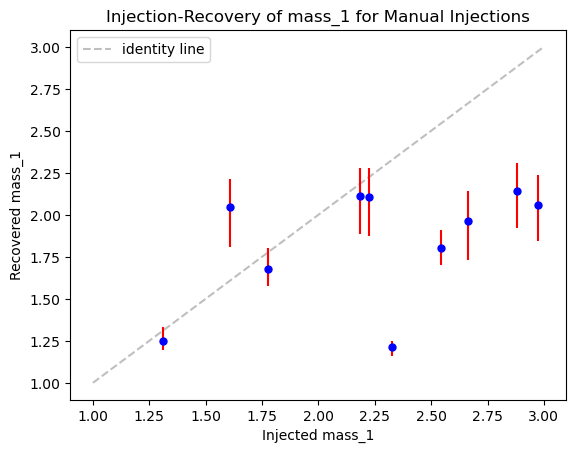

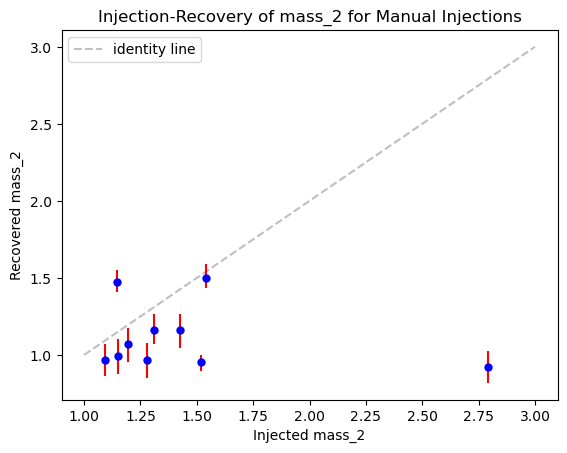

In [ ]:
for (param, bounds) in zip(['mass_1', 'mass_2'], [(1., 3.), (1., 3.)]):
    for i in range(10):
        # Get M1 and M2 from chirp mass and mass ratio
        out_file = f"/home/liteul/memoir_code/manual_inj_test_nlive2048/inj_{i+1}/resampling/posterior_samples.dat"
        samples = pd.read_csv(out_file, delim_whitespace=True)
        Mc = samples["chirp_mass"]
        q  = samples["mass_ratio"]

        m1 = Mc * (1 + q)**(1/5) * q**(-3/5)
        m2 = m1 * q

        samples["mass_1"] = m1
        samples["mass_2"] = m2

        D_L_median = samples[param].median()
        D_L_16 = samples[param].quantile(0.16)
        D_L_84 = samples[param].quantile(0.84)
        # get inj val (json file)
        with open(f"/home/liteul/memoir_code/manual_inj_test_nlive2048/injection.json", 'r') as f:
            inj_data = json.load(f)
        D_L_inj = inj_data['injections']['content'][param][i]
        #print(f"Injection {i+1} for {param}: injected value = {D_L_inj}, recovered median = {D_L_median}")
        plt.errorbar(D_L_inj, D_L_median, yerr=[[D_L_median - D_L_16], [D_L_84 - D_L_median]], fmt='o', markersize=5, color='blue', ecolor='red', zorder=10)
    # plot identity line
    plt.plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', label='identity line', zorder=0, alpha=0.25)
    plt.xlabel(f'Injected {param}')
    plt.ylabel(f'Recovered {param}')
    plt.legend()
    plt.title(f'Injection-Recovery of {param} for Manual Injections')
    file_path = f'/home/liteul/memoir_code/manual_inj_test_nlive2048/plots/{param}_injection_recovery.png'
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    plt.savefig(file_path)
    plt.show()

## PP plot for $\mathcal{M}$ and $q$

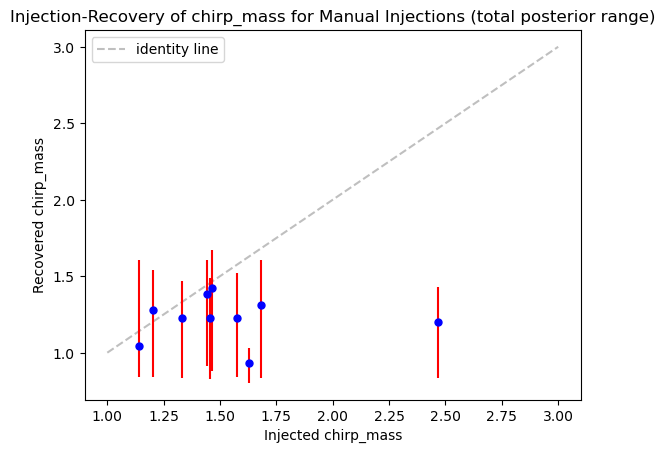

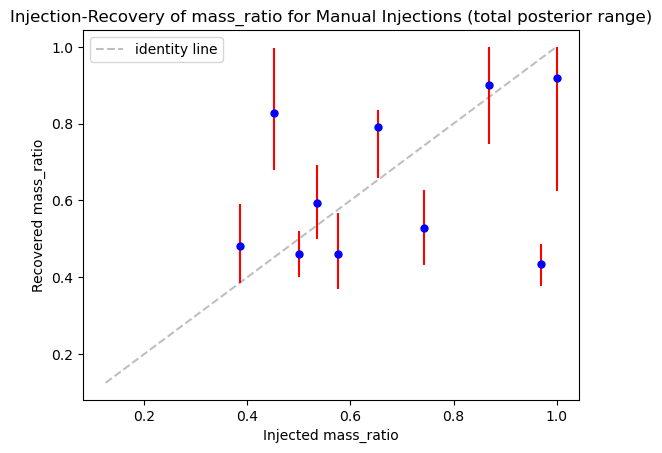

In [5]:
for (param, bounds) in zip(['chirp_mass', 'mass_ratio'], [(1., 3.), (0.125, 1.)]):
    for i in range(10):
        # Get M1 and M2 from chirp mass and mass ratio
        out_file = f"/home/liteul/memoir_code/manual_inj_test_nlive2048/inj_{i+1}/resampling/posterior_samples.dat"
        samples = pd.read_csv(out_file, delim_whitespace=True)

        D_L_median = samples[param].median()
        D_L_16 = samples[param].quantile(0.001)
        D_L_84 = samples[param].quantile(0.999)
        # get inj val (json file)
        with open(f"/home/liteul/memoir_code/manual_inj_test_nlive2048/injection.json", 'r') as f:
            inj_data = json.load(f)
        m1 = inj_data['injections']['content']["mass_1"][i]
        m2 = inj_data['injections']['content']["mass_2"][i]
        inj_chirp = (m1 * m2)**(3/5) / (m1 + m2)**(1/5)
        inj_q = m2 / m1
        D_L_inj = inj_chirp if param == 'chirp_mass' else inj_q
        #print(f"Injection {i+1} for {param}: injected value = {D_L_inj}, recovered median = {D_L_median}")
        plt.errorbar(D_L_inj, D_L_median, yerr=[[D_L_median - D_L_16], [D_L_84 - D_L_median]], fmt='o', markersize=5, color='blue', ecolor='red', zorder=10)
    # plot identity line
    plt.plot([bounds[0], bounds[1]], [bounds[0], bounds[1]], 'k--', label='identity line', zorder=0, alpha=0.25)
    plt.xlabel(f'Injected {param}')
    plt.ylabel(f'Recovered {param}')
    plt.legend()
    plt.title(f'Injection-Recovery of {param} for Manual Injections (total posterior range)')
    file_path = f'/home/liteul/memoir_code/manual_inj_test_nlive2048/plots/{param}_injection_recovery.png'
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    plt.savefig(file_path)
    plt.show()